In [1]:
import pandas as pd
from utils import utils
import os

In [2]:
os.makedirs('../res/prepared', exist_ok=True)
os.makedirs('../res/output', exist_ok=True)

## IEEE

### Unlabeled

In [3]:
ieee = pd.read_csv("../res/input/ieee.csv")
ieee.head()

C:\Users\de130063\AppData\Local\Temp\ipykernel_13292\1938050849.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  ieee = pd.read_csv("../res/input/ieee.csv")


,id,created_at,full_text
0,1.0,2020-04-09 23:59:51+00:00,@KennyDegu very very little volume. With $10T ...
1,2.0,2020-04-09 23:58:55+00:00,#ES_F achieved Target 2780 closing above 50% #...
2,3.0,2020-04-09 23:58:52+00:00,RT @KimbleCharting: Silver/Gold indicator crea...
3,4.0,2020-04-09 23:58:27+00:00,@Issaquahfunds Hedged our $MSFT position into ...
4,5.0,2020-04-09 23:57:59+00:00,RT @zipillinois: 3 Surprisingly Controversial ...


In [4]:
ieee = ieee.rename(columns={"full_text": "text"})
ieee["label"] = ""
ieee.head()

,id,created_at,text,label
0,1.0,2020-04-09 23:59:51+00:00,@KennyDegu very very little volume. With $10T ...,
1,2.0,2020-04-09 23:58:55+00:00,#ES_F achieved Target 2780 closing above 50% #...,
2,3.0,2020-04-09 23:58:52+00:00,RT @KimbleCharting: Silver/Gold indicator crea...,
3,4.0,2020-04-09 23:58:27+00:00,@Issaquahfunds Hedged our $MSFT position into ...,
4,5.0,2020-04-09 23:57:59+00:00,RT @zipillinois: 3 Surprisingly Controversial ...,


In [5]:
ieee.to_csv("../res/prepared/ieee.csv", index=False)

### Labeled and reviewed

In [6]:
ieee_labeled = pd.read_csv("../res/input/ieee_labeled.csv")[:1300]
ieee_labeled.head()

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive


In [7]:
ieee_labeled = ieee_labeled.rename(columns={"sentiment": "label"})
ieee_labeled.head()

,id,created_at,text,label
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive


In [8]:
ieee_labeled.isna().sum()

id            0
created_at    0
text          0
label         0
dtype: int64

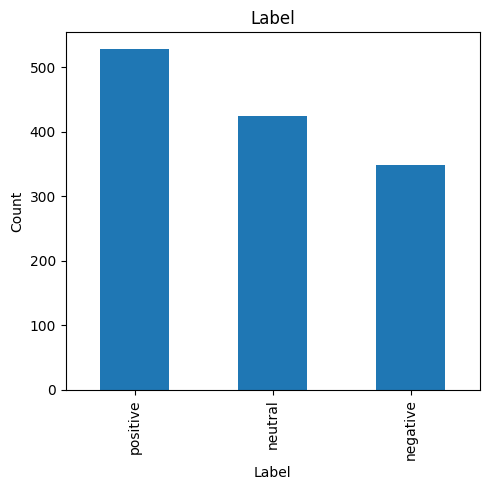

In [9]:
utils.Utils.plot_historgram(ieee_labeled, "label")

In [10]:
ieee_labeled.to_csv("../res/prepared/ieee_labeled.csv", index=False)

## Manual labeled

In [11]:
df_1 = pd.read_excel("../res/input/manual_labeling/Teil_1.xlsx")[:775]
df_1.head()

,date,sentiment,source,subject,text,title,url
0,2023-04-05 06:52:00,"{'class': 'negative', 'polarity': -0.03, 'subj...",CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,https://cointelegraph.com/news/allbridge-to-fi...
1,2023-04-05 06:19:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,https://cryptopotato.com/bitcoin-hodl-patterns...
2,2023-04-05 05:09:00,"{'class': 'negative', 'polarity': -0.04, 'subj...",CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,https://cointelegraph.com/news/eth-hits-7-mont...
3,2023-04-05 01:09:00,"{'class': 'positive', 'polarity': 0.07, 'subje...",CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",https://cointelegraph.com/news/marathon-digita...
4,2023-04-04 23:49:00,"{'class': 'positive', 'polarity': 0.4, 'subjec...",CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,https://cryptopotato.com/brazilian-finance-gia...


In [12]:
# Convert sentiment column from string to dict
df_1["sentiment"] = df_1["sentiment"].apply(eval)

# Split dictionary in separate columns
df_sentiment = pd.json_normalize(df_1["sentiment"])
df_1 = pd.concat([df_1, df_sentiment], axis=1)

# Convert date column to datetime
df_1['date'] = pd.to_datetime(df_1['date'], format='mixed', errors='coerce')

df_1 = df_1.drop(columns=["sentiment", "url"])
df_1 = df_1.rename(columns={"class": "label"})

<Axes: >

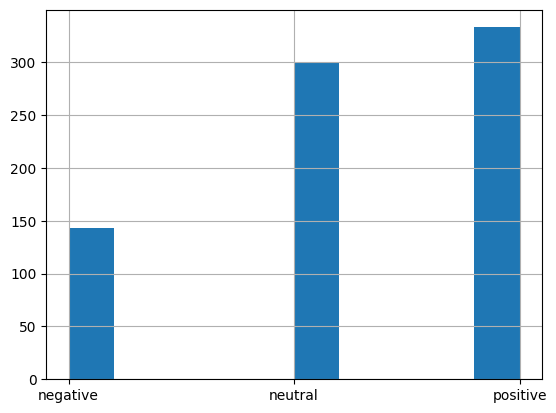

In [13]:
df_1["label"].hist()

In [14]:
df_2 = pd.read_excel("../res/input/manual_labeling/Teil_2.xlsx")[:530]
df_2.head()

,date,sentiment,source,subject,text,title,url
0,2022-12-13 09:54:05,"{'class': 'neutral', 'polarity': 0.21, 'subjec...",CoinTelegraph,blockchain,VeChain is a smart contract-compatible blockch...,What is VeChain (VET) and how does it work?,https://cointelegraph.com/news/what-is-vechain...
1,2022-12-13 09:48:00,"{'class': 'negative', 'polarity': -0.4, 'subje...",CryptoNews,blockchain,Sam Bankman-Fried has been arrested in the Bah...,Breaking: Sam Bankman-Fried Arrested in The Ba...,https://cryptonews.com/news/breaking-sam-bankm...
2,2022-12-13 09:25:54,"{'class': 'neutral', 'polarity': 0.31, 'subjec...",CoinTelegraph,bitcoin,A golden cross is one of the most popular bull...,What is a golden cross pattern and how does it...,https://cointelegraph.com/news/what-is-a-golde...
3,2022-12-13 07:30:05,"{'class': 'neutral', 'polarity': 0.3, 'subject...",CoinTelegraph,bitcoin,A Bitcoiner has literally taken the Lightning ...,Not medical advice: Bitcoiner implants Lightni...,https://cointelegraph.com/news/not-medical-adv...
4,2022-12-13 06:06:00,"{'class': 'negative', 'polarity': 0.0, 'subjec...",CryptoPotato,altcoin,SBF has been arrested in the Bahamas and is li...,Bahamian Authorities Arrest SBF at the Request...,https://cryptopotato.com/bahamian-authorities-...


In [15]:
# Convert sentiment column from string to dict
df_2["sentiment"] = df_2["sentiment"].apply(eval)

# Split dictionary in separate columns
df_sentiment = pd.json_normalize(df_2["sentiment"])
df_2 = pd.concat([df_2, df_sentiment], axis=1)

# Convert date column to datetime
df_2['date'] = pd.to_datetime(df_2['date'], format='mixed', errors='coerce')

df_2 = df_2.drop(columns=["sentiment", "url"])
df_2 = df_2.rename(columns={"class": "label"})

<Axes: >

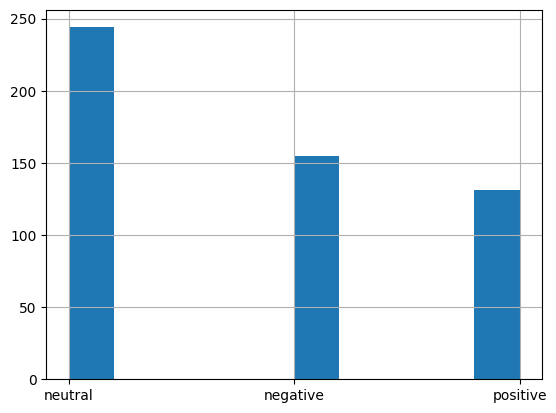

In [16]:
df_2["label"].hist()

In [17]:
df_3 = pd.read_excel("../res/input/manual_labeling/Teil_3.xlsx")[:700]
df_3.head()

,date,label,source,subject,text,title,url,Hyperlink,Unnamed: 8
0,2022-08-21 13:39:00,negative,CryptoPotato,ethereum,Fresh details about bad actors leveraging Torn...,75% of Laundered ETH Lands on Tornado Cash: Re...,https://cryptopotato.com/75-of-laundered-eth-l...,Link,NaN
1,2022-08-21 10:17:00,neutral,CryptoPotato,altcoin,The ECB is considering how a CBDC could ensure...,CBDC Could Combat Market Dominance From BigTec...,https://cryptopotato.com/cbdc-could-combat-mar...,Link,NaN
2,2022-08-21 09:10:00,neutral,CoinTelegraph,blockchain,Security stands as one of the most crucial fea...,Can Web3 be hacked? Is the decentralized inter...,https://cointelegraph.com/news/can-web3-be-hac...,Link,NaN
3,2022-08-21 05:19:00,positive,CoinTelegraph,blockchain,The revenue breakdown discloses a 1842.85% inc...,"FTX revenue reportedly grew 1000% in one year,...",https://cointelegraph.com/news/ftx-revenue-rep...,Link,NaN
4,2022-08-21 01:39:00,positive,CryptoPotato,altcoin,The crypto winter has been a great opportunity...,"FTX Increased Revenue By 1,000% in 2021 â€”And...",https://cryptopotato.com/ftx-had-1000-more-rev...,Link,NaN


<Axes: >

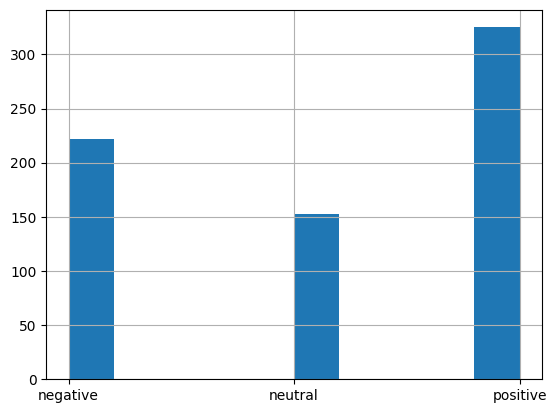

In [18]:
df_3["label"].hist()

In [19]:
df_4 = pd.read_excel("../res/input/manual_labeling/Teil_4.xlsx")[:445]
df_4.head()

,date,sentiment,source,subject,text,title,url
0,2022-04-27 22:59:28,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,bitcoin,Senator and outspoken crypto proponent Indira ...,Bitcoin ATM installed in Mexico's Senate Building,https://cointelegraph.com/news/bitcoin-atm-ins...
1,2022-04-27 21:30:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoPotato,bitcoin,Only 40% of El Salvadorans have downloaded the...,El Salvadorâ€™s Bitcoin Adoption Is Yet to Cap...,https://cryptopotato.com/el-salvadors-bitcoin-...
2,2022-04-27 20:51:20,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,blockchain,"Retail digital payments are growing, but the c...",The Philippines will launch pilot wholesale ce...,https://cointelegraph.com/news/the-philippines...
3,2022-04-27 20:00:06,"{'class': 'negative', 'polarity': -0.1, 'subje...",CoinTelegraph,bitcoin,BTC and select altcoins could be gearing up fo...,"Price analysis 4/27: BTC, ETH, BNB, XRP, SOL, ...",https://cointelegraph.com/news/price-analysis-...
4,2022-04-27 19:44:00,"{'class': 'neutral', 'polarity': 0.2, 'subject...",CryptoPotato,altcoin,Cuban central bank has revealed that licenses ...,Cuban Central Bank to Issue Licenses to Virtua...,https://cryptopotato.com/cuban-central-bank-to...


In [20]:
# Convert sentiment column from string to dict
df_4["sentiment"] = df_4["sentiment"].apply(eval)

# Split dictionary in separate columns
df_sentiment = pd.json_normalize(df_4["sentiment"])
df_4 = pd.concat([df_4, df_sentiment], axis=1)

# Convert date column to datetime
df_4['date'] = pd.to_datetime(df_4['date'], format='mixed', errors='coerce')

df_4 = df_4.drop(columns=["sentiment", "url"])
df_4 = df_4.rename(columns={"class": "label"})

In [21]:
df_4["label"] = df_4["label"].replace({"postive": "positive"})

<Axes: >

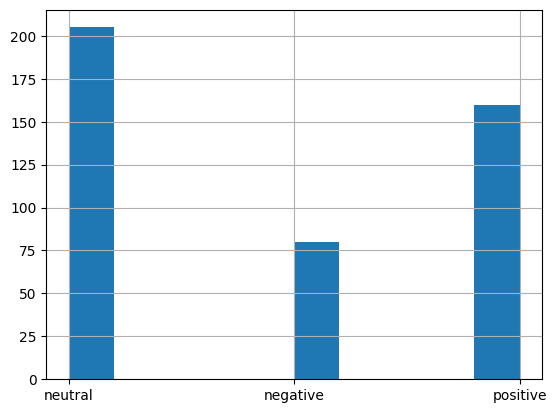

In [22]:
df_4["label"].hist()

In [23]:
cryptonews_manual = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)
cryptonews_manual

,date,source,subject,text,title,label,polarity,subjectivity,url,Hyperlink,Unnamed: 8
0,2023-04-05 06:52:00,CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,negative,-0.03,0.20,NaN,NaN,NaN
1,2023-04-05 06:19:00,CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,neutral,0.00,0.00,NaN,NaN,NaN
2,2023-04-05 05:09:00,CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,negative,-0.04,0.31,NaN,NaN,NaN
3,2023-04-05 01:09:00,CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",positive,0.07,0.23,NaN,NaN,NaN
4,2023-04-04 23:49:00,CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,positive,0.40,0.40,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2445,2022-04-17 12:45:00,CryptoPotato,altcoin,Buterin says he's not opposed to Musk's Twitte...,Vitalik Buterinâ€™s Take on the Musk-Twitter T...,neutral,-0.27,0.49,NaN,NaN,NaN
2446,2022-04-17 11:16:57,CoinTelegraph,blockchain,DeFi can usher in a system where people donâ€™...,"The world doesnâ€™t need banks, policymakers o...",neutral,0.00,0.00,NaN,NaN,NaN
2447,2022-04-17 10:52:47,CoinTelegraph,altcoin,AMC Theatre CEO Adam Aron disclosed that the i...,"AMC Theatres mobile app accepts Dogecoin, Shib...",neutral,0.00,0.00,NaN,NaN,NaN
2448,2022-04-17 10:05:00,CryptoPotato,blockchain,The first NFT flight tickets got available for...,Air Europa Releases the First NFT Flight Ticke...,neutral,0.15,0.38,NaN,NaN,NaN


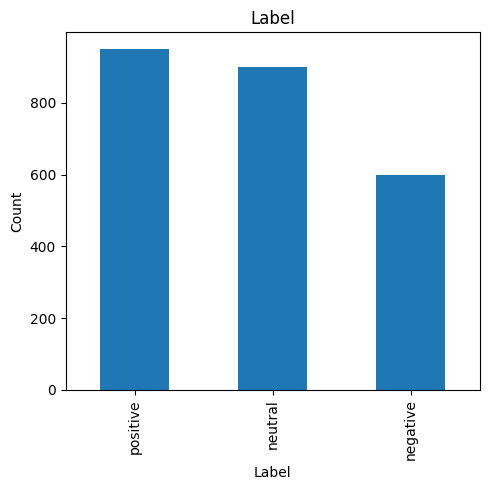

In [24]:
utils.Utils.plot_historgram(cryptonews_manual, "label")

In [25]:
cryptonews_manual.to_csv("../res/prepared/cryptonews_manual.csv", index=False)

In [26]:
raise SystemError

SystemError: 

## Kaggle

### Crypto tweets

In [12]:
cryptonews = pd.read_csv("../res/input/cryptonews_manual.csv")
cryptonews.head()

,date,sentiment,source,subject,text,title,url
0,4/5/2023 6:52,"{'class': 'negative', 'polarity': -0.03, 'subj...",CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,https://cointelegraph.com/news/allbridge-to-fi...
1,4/5/2023 6:19,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,https://cryptopotato.com/bitcoin-hodl-patterns...
2,4/5/2023 5:09,"{'class': 'negative', 'polarity': -0.04, 'subj...",CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,https://cointelegraph.com/news/eth-hits-7-mont...
3,4/5/2023 1:09,"{'class': 'positive', 'polarity': 0.07, 'subje...",CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",https://cointelegraph.com/news/marathon-digita...
4,4/4/2023 23:49,"{'class': 'positive', 'polarity': 0.4, 'subjec...",CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,https://cryptopotato.com/brazilian-finance-gia...


In [13]:
cryptonews.describe()

,date,sentiment,source,subject,text,title,url
count,18543,18543,18543,18543,18543,18486,18406
unique,17843,3217,3,6,18130,18434,18406
top,1/14/2022 0:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,bitcoin,"Get your daily, bite-sized digest of cryptoass...",Bitcoin Price and Ethereum Prediction,https://cointelegraph.com/news/allbridge-to-fi...
freq,26,4193,8675,6439,326,15,1


In [14]:
cryptonews.isnull().sum()

date           0
sentiment      0
source         0
subject        0
text           0
title         57
url          137
dtype: int64

In [15]:
# Convert sentiment column from string to dict
cryptonews["sentiment"] = cryptonews["sentiment"].apply(eval)

# Split dictionary in separate columns
df_sentiment = pd.json_normalize(cryptonews["sentiment"])
cryptonews = pd.concat([cryptonews, df_sentiment], axis=1)

# Convert date column to datetime
cryptonews['date'] = pd.to_datetime(cryptonews['date'], format='mixed', errors='coerce')

cryptonews = cryptonews.drop(columns=["sentiment", "url"])
cryptonews = cryptonews.rename(columns={"class": "label"})
min_date = cryptonews['date'].min()
max_date = cryptonews['date'].max()

print("Min Date:", min_date)
print("Max Date:", max_date)

cryptonews.head()

Min Date: 2021-10-12 20:00:00
Max Date: 2023-04-05 06:52:00


,date,source,subject,text,title,label,polarity,subjectivity
0,2023-04-05 06:52:00,CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,negative,-0.03,0.20
1,2023-04-05 06:19:00,CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,neutral,0.00,0.00
2,2023-04-05 05:09:00,CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,negative,-0.04,0.31
3,2023-04-05 01:09:00,CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",positive,0.07,0.23
4,2023-04-04 23:49:00,CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,positive,0.40,0.40


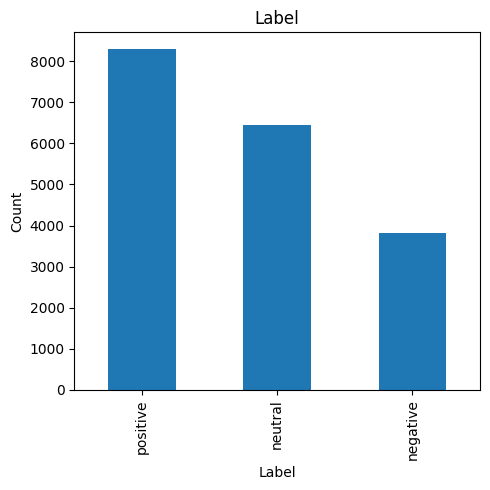

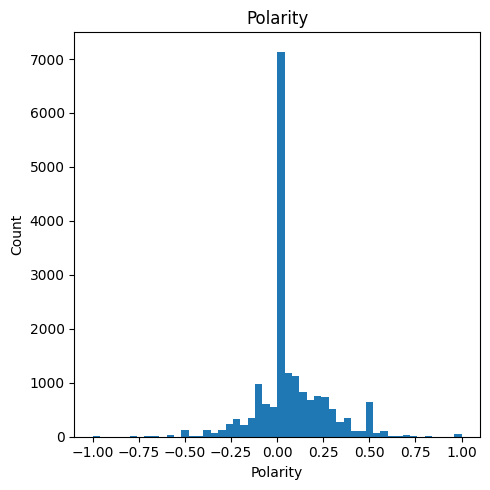

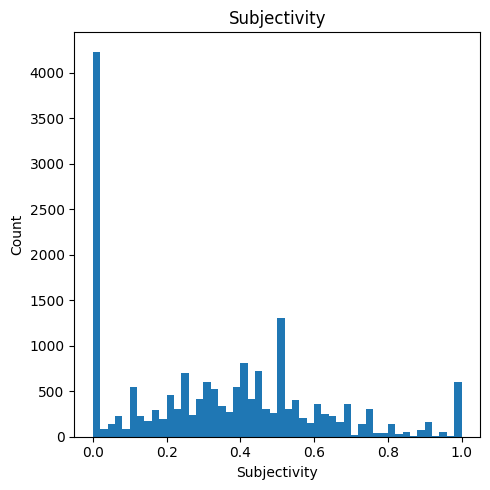

In [16]:
columns_to_plot = ["label", "polarity", "subjectivity"]

for column in columns_to_plot:
    utils.Utils.plot_historgram(cryptonews, column)

crypto            4083
bitcoin           3645
's                2877
price             2363
’                 2126
                  ... 
drink                1
kbs                  1
\x9ccrypto\x9d       1
rotated              1
high-skilled         1
Name: count, Length: 23110, dtype: int64


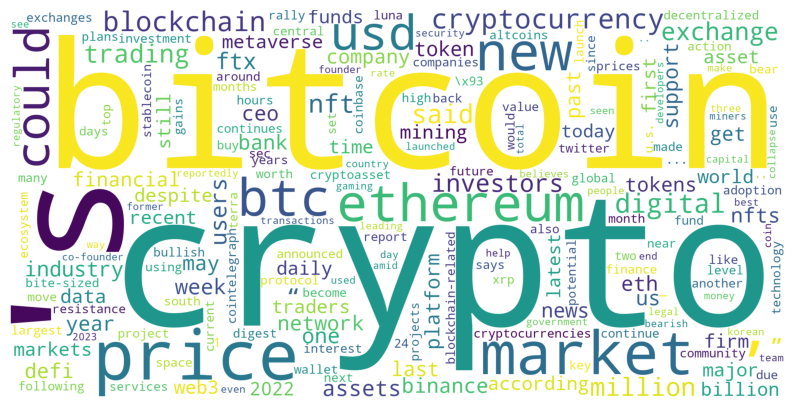

In [17]:
word_freq = utils.Utils.plot_wordcloud(cryptonews, "text")

In [18]:
word_freq = pd.DataFrame(word_freq)

# Excel writer with differnt sheets
writer = pd.ExcelWriter("../res/output/cryptonews.xlsx")
cryptonews.to_excel(writer, sheet_name="Data")
word_freq.to_excel(writer, sheet_name="WordFreq")

writer.close()

In [19]:
cryptonews.to_csv("../res/prepared/cryptonews.csv", index=False)

## Huggingface

### Indian Financial News

In [20]:
indian_financial_news = pd.read_csv("hf://datasets/kdave/Indian_Financial_News/training_data_26000.csv")
indian_financial_news.head()

,URL,Content,Summary,Sentiment
0,https://www.moneycontrol.com/news/business/eco...,US consumer spending dropped by a record in Ap...,consumer spending plunges 13.6 percent in Apri...,Negative
1,https://www.businesstoday.in/top-story/state-r...,State-run lenders require an urgent Rs 1.2 tri...,government will have to take a bulk of the tab...,Negative
2,https://www.financialexpress.com/economy/covid...,Apparel exporters on Wednesday urged the gover...,exporters are facing issues in terms of raw ma...,Negative
3,https://www.moneycontrol.com/news/business/mar...,Asian shares battled to extend a global reboun...,the dollar loses some ground on the safe haven...,Negative
4,https://www.financialexpress.com/industry/six-...,After India’s sovereign credit rating fell to ...,six Indian public-sector undertakings have tak...,Negative


In [21]:
indian_financial_news = indian_financial_news.rename(columns={"Content": "text", "Sentiment": "label"})
indian_financial_news["label"] = indian_financial_news["label"].replace({"Negative": "negative", "Neutral": "neutral", "Positive": "positive"})
indian_financial_news.head()

,URL,text,Summary,label
0,https://www.moneycontrol.com/news/business/eco...,US consumer spending dropped by a record in Ap...,consumer spending plunges 13.6 percent in Apri...,negative
1,https://www.businesstoday.in/top-story/state-r...,State-run lenders require an urgent Rs 1.2 tri...,government will have to take a bulk of the tab...,negative
2,https://www.financialexpress.com/economy/covid...,Apparel exporters on Wednesday urged the gover...,exporters are facing issues in terms of raw ma...,negative
3,https://www.moneycontrol.com/news/business/mar...,Asian shares battled to extend a global reboun...,the dollar loses some ground on the safe haven...,negative
4,https://www.financialexpress.com/industry/six-...,After India’s sovereign credit rating fell to ...,six Indian public-sector undertakings have tak...,negative


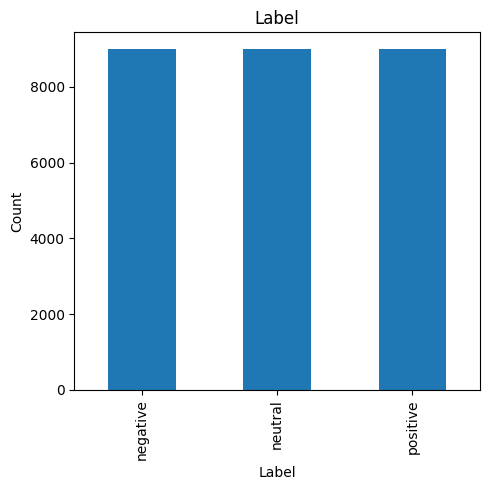

In [22]:
utils.Utils.plot_historgram(indian_financial_news, "label")

In [23]:
# word_freq = utils.Utils.plot_wordcloud(indian_financial_news, "text")

In [24]:
word_freq = pd.DataFrame(word_freq)

writer = pd.ExcelWriter("../res/output/indian_financial_news.xlsx")
indian_financial_news.to_excel(writer, sheet_name="Data")
word_freq.to_excel(writer, sheet_name="WordFreq")

writer.close()

In [25]:
indian_financial_news.to_csv("../res/prepared/indian_financial_news.csv", index=False)

### zeroshot twitter financial news

In [26]:
splits = {'train': 'sent_train.csv', 'validation': 'sent_valid.csv'}
hf_twitter_financial_news_train = pd.read_csv("hf://datasets/zeroshot/twitter-financial-news-sentiment/" + splits["train"])
hf_twitter_financial_news_val = pd.read_csv("hf://datasets/zeroshot/twitter-financial-news-sentiment/" + splits["validation"])

hf_twitter_financial_news = pd.concat([hf_twitter_financial_news_train, hf_twitter_financial_news_val], ignore_index=True)
hf_twitter_financial_news.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [27]:
hf_twitter_financial_news["label"] = hf_twitter_financial_news["label"].replace({0: "negative", 1: "positive", 2: "neutral"})
hf_twitter_financial_news

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,negative
1,$CCL $RCL - Nomura points to bookings weakness...,negative
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",negative
3,$ESS: BTIG Research cuts to Neutral https://t....,negative
4,$FNKO - Funko slides after Piper Jaffray PT cu...,negative
...,...,...
11926,Stocks making the biggest moves midday: TD Ame...,neutral
11927,Stocks making the biggest moves premarket: Fit...,neutral
11928,Stocks making the biggest moves premarket: Hom...,neutral
11929,Stocks making the biggest moves premarket: TD ...,neutral


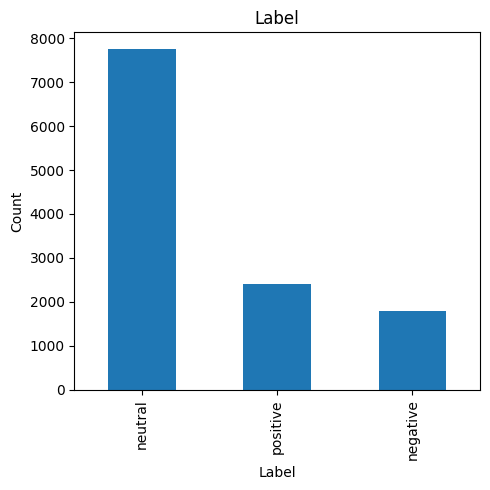

In [28]:
utils.Utils.plot_historgram(hf_twitter_financial_news, "label")

https                6378
's                   1522
stock                1135
’                     788
new                   531
                     ... 
//t.co/iatk1pt1uf       1
platts                  1
//t.co/u6hptfpb7o       1
//t.co/hlhvyhefxz       1
gpor                    1
Name: count, Length: 26540, dtype: int64


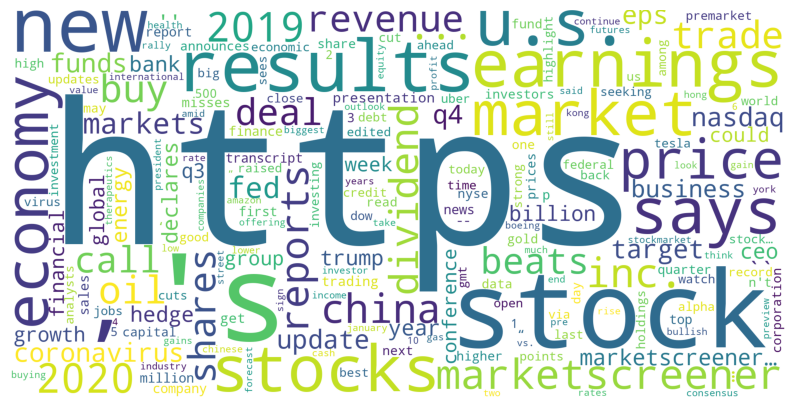

In [29]:
word_freq = utils.Utils.plot_wordcloud(hf_twitter_financial_news, "text")

In [30]:
hf_twitter_financial_news.to_csv("../res/prepared/hf-twitter-financial-news.csv", index=False)

### ElKulako/stocktwits-crypto

In [31]:
stocktwits_crpyto = pd.read_excel("../res/input/st-data-full.xlsx")
stocktwits_crpyto

,text,label
0,"if you were curious, price chose the lowest ch...",1
1,"true, not even 10k followers here yet.",1
2,dogecoin co-founder billy markus hits back at ...,1
3,"i’m curious, do any bulls have a price where ...",1
4,friday everybody buy 10 more on friday,2
...,...,...
599995,so did i 850% with ! get in below a dollar. st...,2
599996,notice it’s the same few brain dead people bas...,2
599997,attention!!! anyone under the age of 18…. stea...,2
599998,dickhead bears fucked. keep your big mouths s...,2


In [32]:
stocktwits_crpyto["label"] = stocktwits_crpyto["label"].astype("str")
stocktwits_crpyto["label"].unique()

array(['1', '2', '0'], dtype=object)

In [33]:
stocktwits_crpyto = stocktwits_crpyto.dropna(how="any")
stocktwits_crpyto

,text,label
0,"if you were curious, price chose the lowest ch...",1
1,"true, not even 10k followers here yet.",1
2,dogecoin co-founder billy markus hits back at ...,1
3,"i’m curious, do any bulls have a price where ...",1
4,friday everybody buy 10 more on friday,2
...,...,...
599995,so did i 850% with ! get in below a dollar. st...,2
599996,notice it’s the same few brain dead people bas...,2
599997,attention!!! anyone under the age of 18…. stea...,2
599998,dickhead bears fucked. keep your big mouths s...,2


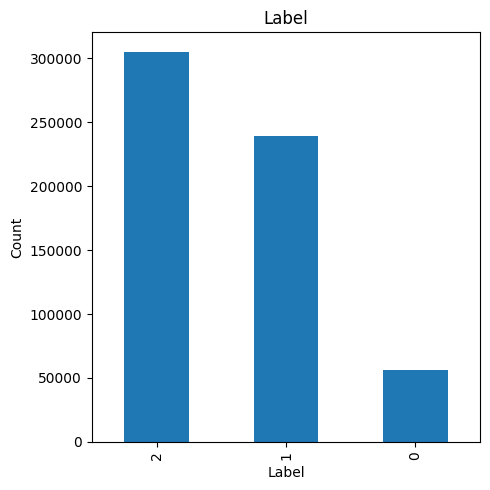

In [34]:
utils.Utils.plot_historgram(stocktwits_crpyto, "label")

In [35]:
# word_freq = utils.Utils.plot_wordcloud(stocktwits_crpyto, "text")

In [36]:
stocktwits_crpyto.to_csv("../res/prepared/st-data-full.csv", index=False)

## Reddit Sentiment

In [37]:
reddit_sentiment = pd.read_csv("../res/input/reddit_sentiment_august2021.csv")
reddit_sentiment.head()

,Unnamed: 0,created_utc,body,permalink,comments_sentiment,tb_polarity,tb_subjectivity,anger,joy,optimism,sadness,sia_pos,sia_neg,sia_neu,sid_com,reddit_flair,BERT-Sentiment
0,0,1627776001,first time since 2017 bitcoin closed red candl...,https://old.reddit.com/r/CryptoCurrency/commen...,0.000000,0.061104,0.309593,0.563690,0.305246,0.049794,0.081270,0.198,0.068,0.733,0.8580,-1.0000,1
1,1,1627776002,"tokemon next cryptozoon, axie infinity, fully ...",https://old.reddit.com/r/CryptoMoonShots/comme...,-0.124400,-0.002652,0.440666,0.044809,0.897691,0.043723,0.013777,0.135,0.048,0.818,0.9708,0.9998,5
2,2,1627776013,monthly skeptics discussion - august 2021. wel...,https://old.reddit.com/r/CryptoCurrency/commen...,0.186222,0.217857,0.567857,0.167937,0.072169,0.662445,0.097450,0.196,0.095,0.709,0.9595,-0.9156,1
3,3,1627776014,"daily discussion - august 1, 2021 . **welcome ...",https://old.reddit.com/r/CryptoCurrency/commen...,0.325367,0.069699,0.418953,0.534763,0.036525,0.213674,0.215038,0.181,0.106,0.713,0.8522,-0.9967,1
4,4,1627776079,"daily discussion - august 01, 2021. welcome fr...",https://old.reddit.com/r/SatoshiStreetBets/com...,0.362911,0.268523,0.441288,0.074949,0.610221,0.287142,0.027688,0.221,0.083,0.695,0.8975,-0.5160,5


In [38]:
reddit_sentiment = reddit_sentiment.rename(columns={"BERT-Sentiment": "label", "body": "text"})
reddit_sentiment.head()

,Unnamed: 0,created_utc,text,permalink,comments_sentiment,tb_polarity,tb_subjectivity,anger,joy,optimism,sadness,sia_pos,sia_neg,sia_neu,sid_com,reddit_flair,label
0,0,1627776001,first time since 2017 bitcoin closed red candl...,https://old.reddit.com/r/CryptoCurrency/commen...,0.000000,0.061104,0.309593,0.563690,0.305246,0.049794,0.081270,0.198,0.068,0.733,0.8580,-1.0000,1
1,1,1627776002,"tokemon next cryptozoon, axie infinity, fully ...",https://old.reddit.com/r/CryptoMoonShots/comme...,-0.124400,-0.002652,0.440666,0.044809,0.897691,0.043723,0.013777,0.135,0.048,0.818,0.9708,0.9998,5
2,2,1627776013,monthly skeptics discussion - august 2021. wel...,https://old.reddit.com/r/CryptoCurrency/commen...,0.186222,0.217857,0.567857,0.167937,0.072169,0.662445,0.097450,0.196,0.095,0.709,0.9595,-0.9156,1
3,3,1627776014,"daily discussion - august 1, 2021 . **welcome ...",https://old.reddit.com/r/CryptoCurrency/commen...,0.325367,0.069699,0.418953,0.534763,0.036525,0.213674,0.215038,0.181,0.106,0.713,0.8522,-0.9967,1
4,4,1627776079,"daily discussion - august 01, 2021. welcome fr...",https://old.reddit.com/r/SatoshiStreetBets/com...,0.362911,0.268523,0.441288,0.074949,0.610221,0.287142,0.027688,0.221,0.083,0.695,0.8975,-0.5160,5


In [39]:
reddit_sentiment["label"] = reddit_sentiment["label"].astype("str")

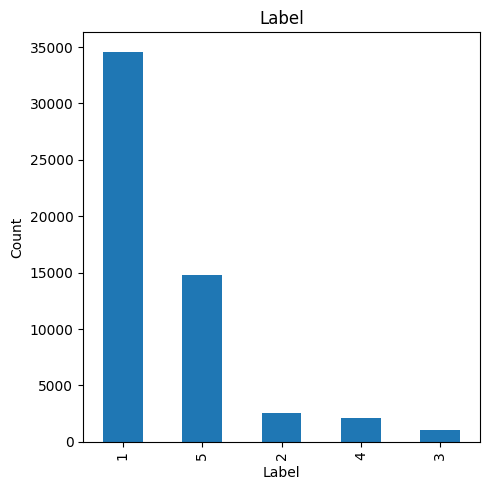

In [40]:
utils.Utils.plot_historgram(reddit_sentiment, "label")

In [41]:
# word_freq = utils.Utils.plot_wordcloud(reddit_sentiment, "text")

In [42]:
reddit_sentiment.to_csv("../res/prepared/reddit_sentiment_august2021.csv", index=False)

## Github

### Applied-AI-Research-Lab/LLM-and-NLP-models-in-Cryptocurrency-Sentiment-Analysis

In [43]:
cryptonews_new = pd.read_csv("../res/input/cryptonews_neu.csv")
cryptonews_new

,id,sentiment,source,subject,text,title
0,10822,negative,cryptonews,altcoin,the ethereum price has dipped by 05 in the pas...,ethereum price prediction as lido eth staking ...
1,7849,neutral,cryptopotato,altcoin,garlinghouse also asserted that us congress sh...,ripples victory over sec is a win for the enti...
2,11657,neutral,cryptonews,altcoin,south korean prosecutors called terra a fictit...,terra cofounder among ten formally charged in ...
3,20528,negative,cointelegraph,bitcoin,a bitcointhemed bar and education center has p...,raising a glass to satoshis place and the chal...
4,18433,negative,cointelegraph,blockchain,ark investments topped up its coinbase stock s...,cathie woods ark adds 121m in coinbase shares ...
...,...,...,...,...,...,...
4995,2231,positive,cointelegraph,nft,the simpsons poked fun at nfts in their annual...,nifty news the simpsons roast nfts yuga labs e...
4996,16173,negative,cointelegraph,defi,while it has become harder to access the crypt...,decentralization meant sanctions couldnt pull ...
4997,8916,neutral,cryptopotato,nft,yuga labs plans to publish a cryptopunks book ...,cryptopunks nft collection turns six heres the...
4998,16228,positive,cointelegraph,bitcoin,the central african republic adopted bitcoin a...,bitcoin sango coin and the central african rep...


In [44]:
cryptonews_new = cryptonews_new.rename(columns={"sentiment": "label"})
cryptonews_new = cryptonews_new.dropna(how="any")
cryptonews_new

,id,label,source,subject,text,title
0,10822,negative,cryptonews,altcoin,the ethereum price has dipped by 05 in the pas...,ethereum price prediction as lido eth staking ...
1,7849,neutral,cryptopotato,altcoin,garlinghouse also asserted that us congress sh...,ripples victory over sec is a win for the enti...
2,11657,neutral,cryptonews,altcoin,south korean prosecutors called terra a fictit...,terra cofounder among ten formally charged in ...
3,20528,negative,cointelegraph,bitcoin,a bitcointhemed bar and education center has p...,raising a glass to satoshis place and the chal...
4,18433,negative,cointelegraph,blockchain,ark investments topped up its coinbase stock s...,cathie woods ark adds 121m in coinbase shares ...
...,...,...,...,...,...,...
4995,2231,positive,cointelegraph,nft,the simpsons poked fun at nfts in their annual...,nifty news the simpsons roast nfts yuga labs e...
4996,16173,negative,cointelegraph,defi,while it has become harder to access the crypt...,decentralization meant sanctions couldnt pull ...
4997,8916,neutral,cryptopotato,nft,yuga labs plans to publish a cryptopunks book ...,cryptopunks nft collection turns six heres the...
4998,16228,positive,cointelegraph,bitcoin,the central african republic adopted bitcoin a...,bitcoin sango coin and the central african rep...


In [45]:
cryptonews_new["label"] = cryptonews_new["label"].replace({1: "positive", 0: "negative", 2: "neutral"})
cryptonews_new

,id,label,source,subject,text,title
0,10822,negative,cryptonews,altcoin,the ethereum price has dipped by 05 in the pas...,ethereum price prediction as lido eth staking ...
1,7849,neutral,cryptopotato,altcoin,garlinghouse also asserted that us congress sh...,ripples victory over sec is a win for the enti...
2,11657,neutral,cryptonews,altcoin,south korean prosecutors called terra a fictit...,terra cofounder among ten formally charged in ...
3,20528,negative,cointelegraph,bitcoin,a bitcointhemed bar and education center has p...,raising a glass to satoshis place and the chal...
4,18433,negative,cointelegraph,blockchain,ark investments topped up its coinbase stock s...,cathie woods ark adds 121m in coinbase shares ...
...,...,...,...,...,...,...
4995,2231,positive,cointelegraph,nft,the simpsons poked fun at nfts in their annual...,nifty news the simpsons roast nfts yuga labs e...
4996,16173,negative,cointelegraph,defi,while it has become harder to access the crypt...,decentralization meant sanctions couldnt pull ...
4997,8916,neutral,cryptopotato,nft,yuga labs plans to publish a cryptopunks book ...,cryptopunks nft collection turns six heres the...
4998,16228,positive,cointelegraph,bitcoin,the central african republic adopted bitcoin a...,bitcoin sango coin and the central african rep...


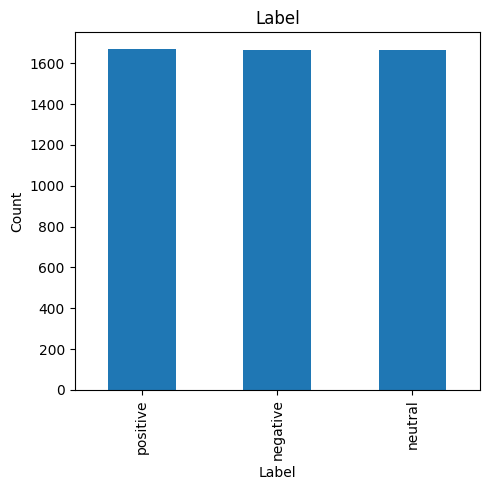

In [46]:
utils.Utils.plot_historgram(cryptonews_new, "label")

crypto            1097
bitcoin            974
price              645
market             463
cryptocurrency     339
                  ... 
expertsxa0           1
abused               1
fullscope            1
abra                 1
sixth                1
Name: count, Length: 12159, dtype: int64


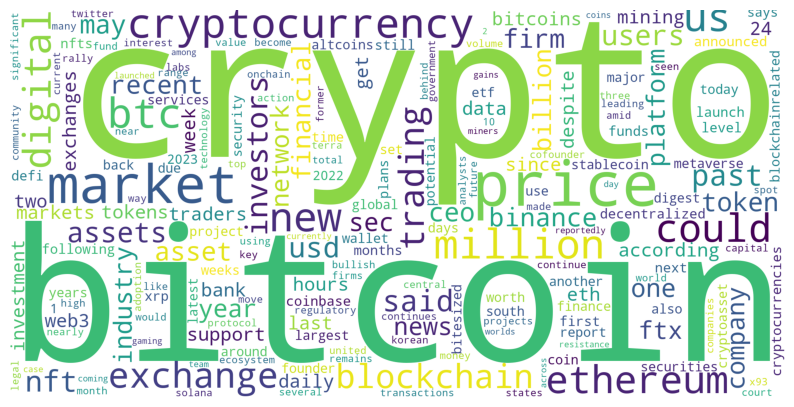

In [47]:
word_freq = utils.Utils.plot_wordcloud(cryptonews_new, "text")

In [48]:
cryptonews_new.to_csv("../res/prepared/cryptonews_neu.csv", index=False)

## Concatenation

In [49]:
con_cryptonews = cryptonews[["text", "label"]]
con_hf_twitter_financial_news = hf_twitter_financial_news[["text", "label"]]

In [50]:
concatenation = pd.concat([con_cryptonews, con_hf_twitter_financial_news], ignore_index=True)
concatenation

,text,label
0,The compensation process is expected to start ...,negative
1,On-chain analytics revealed a sentiment shift ...,neutral
2,"Ether has broken the $1,900 resistance level f...",negative
3,"With a new quarterly production record, Marath...",positive
4,The stablecoin BTG Dol will supposedly become ...,positive
...,...,...
30469,Stocks making the biggest moves midday: TD Ame...,neutral
30470,Stocks making the biggest moves premarket: Fit...,neutral
30471,Stocks making the biggest moves premarket: Hom...,neutral
30472,Stocks making the biggest moves premarket: TD ...,neutral


<Axes: >

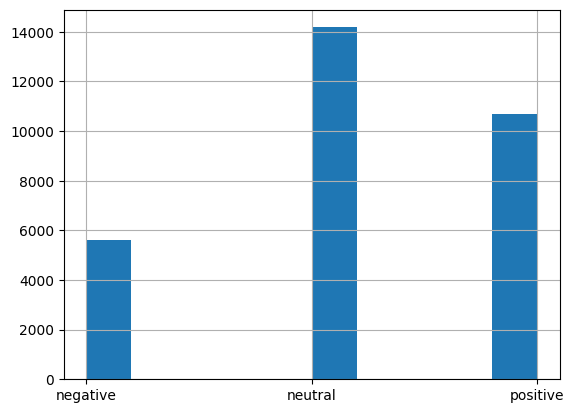

In [51]:
concatenation["label"].hist()

In [52]:
concatenation.to_csv("../res/prepared/concatenation.csv", index=False)